Part-f (optional bonus) Code from scratch for the backpropagation algorithm

In [85]:
import numpy as np
import pandas as pd

np.random.seed(0)

In [86]:
df = pd.read_csv('direhorse_data.csv')
shuffled_df = df.sample(frac=1,random_state=1).reset_index(drop=True)

X_train, y_train = shuffled_df[:50]['Ages'], shuffled_df[:50]['Weights']
X_test, y_test = shuffled_df[50:]['Ages'], df[50:]['Weights'] 

X_train = np.array(X_train).reshape(1,X_train.shape[0])
y_train = np.array(y_train).reshape(1, y_train.shape[0])
X_test = np.array(X_test).reshape(1,X_test.shape[0])
y_test = np.array(y_test).reshape(1, y_test.shape[0])
print ('Train X Shape: ', X_train.shape)
print ('Test X Shape: ', X_test.shape)

Train X Shape:  (1, 50)
Test X Shape:  (1, 21)


In [87]:
def sigmoid(x):
  return 1/(1+np.exp(-x))
def sigmoid_der(x):
  return sigmoid(x)*(1-sigmoid(x))
def tanh(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(+x)+np.exp(-x))
def tanh_der(x):
  return 1 - np.power(tanh(x),2)
def relu(x):
  x[x<0] = 0
  return x

In [88]:
def normalize(X):
  norm = np.linalg.norm(X)
  return X/norm

In [89]:
def parameters_initialization(input_unit, hidden_unit, output_unit):
    W1 = np.random.randn(hidden_unit, input_unit)*((2/hidden_unit)**0.5)
    b1 = np.zeros((hidden_unit, 1))
    W2 = np.random.randn(output_unit, hidden_unit)*((2/hidden_unit)**0.5)
    b2 = np.zeros((output_unit, 1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [90]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2
    cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    
    return A2, cache

In [91]:
def mse(A2, Y):
    m = Y.shape[1] 
    cost = (1/2)*np.sum(np.square(A2-Y))/m
    cost = float(np.squeeze(cost))

    return cost

In [92]:
def backward_propagation(parameters, cache, X, Y):
    #number of training example
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    Z1 = cache['Z1']
    Z2 = cache['Z2']
   
    dZ2 = (A2-Y)
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), sigmoid_der(Z2))
    dW1 = (1/m) * np.dot(dZ1, X.T) 
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2,"db2": db2}
    
    return grads

In [93]:
def gradient_descent(parameters, grads, learning_rate = 0.001):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
   
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1, "b1": b1,"W2": W2,"b2": b2}
    
    return parameters

In [94]:
def neural_network_model(X, Y, hidden_unit, num_iterations = 1000, verbose=True):
    input_unit = 1
    output_unit = 1
    
    parameters = parameters_initialization(input_unit, hidden_unit, output_unit)
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    for i in range(0, num_iterations+1):
        A2, cache = forward_propagation(X, parameters)
        cost = mse(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        prev = parameters
        parameters = gradient_descent(parameters, grads)
        if verbose:
          if i % 100 == 0:
              print ("Cost after iteration %i: %f &" %(i, cost), "Validation Cost %i: %f" %(i,mse(forward_propagation(X_test,parameters)[0],y_test)))

    return parameters

parameters = neural_network_model(X_train, y_train, 100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Cost after iteration 0: 13178.819397 & Validation Cost 0: 21153.060640
Cost after iteration 100: 1850.881874 & Validation Cost 100: 2390.057107
Cost after iteration 200: 1836.800726 & Validation Cost 200: 2337.905507
Cost after iteration 300: 1823.346443 & Validation Cost 300: 2346.486763
Cost after iteration 400: 1810.024782 & Validation Cost 400: 2355.517705
Cost after iteration 500: 1796.834387 & Validation Cost 500: 2364.593314
Cost after iteration 600: 1783.773939 & Validation Cost 600: 2373.709802
Cost after iteration 700: 1770.842132 & Validation Cost 700: 2382.866103
Cost after iteration 800: 1758.037673 & Validation Cost 800: 2392.061183
Cost after iteration 900: 1745.359281 & Validation Cost 900: 2401.294020
Cost after iteration 1000: 1732.805691 & Validation Cost 1000: 2410.563607


In [95]:
mse(forward_propagation(X_test,parameters)[0],y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


2410.563607227052

In [96]:
hidden_units_array = []
MSEs = []
for hidden_units in np.linspace(1,500,25):
  hidden_units = int(hidden_units)
  parameters = neural_network_model(normalize(X_train), y_train, hidden_units, verbose=False)
  hidden_units_array.append(hidden_units)
  MSEs.append(mse(forward_propagation(normalize(X_test),parameters)[0],y_test))
  print(hidden_units,mse(forward_propagation(normalize(X_test),parameters)[0],y_test))

1 6064.09099846886
21 2324.937326545779
42 2319.443886149116
63 2324.7527606614203
84 2315.7009371592508
104 2315.6154461907136
125 2312.460218549788
146 2308.070085196346
167 2312.3833248529436
188 2315.2302523137296
208 2315.448274660022
229 2314.7219580561723
250 2314.6735221037984
271 2310.9615202821883
292 2314.035746135011
312 2312.461359922078
333 2312.3350960202647
354 2313.0463504666386
375 2311.1564327073575
396 2312.114054727163
416 2313.7551534412833
437 2314.6358777723167
458 2311.0316372061143
479 2312.3797420050855
500 2312.766648243312


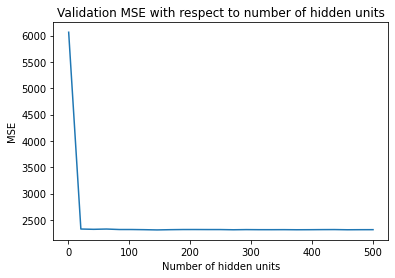

In [97]:
import matplotlib.pyplot as plt
plt.plot(hidden_units_array,MSEs)
plt.xlabel("Number of hidden units")
plt.ylabel("MSE")
plt.title("Validation MSE with respect to number of hidden units")
plt.show()